In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import yfinance as yf
from analitica.operations.statistic_operations import StockAnalysis

Получаем данные акций компании Apple за последние три месяца. 
Сбрасываем часовой пояс. 

In [4]:
apple = yf.Ticker("AAPL")
history = apple.history(period="3mo")
history.index = history.index.tz_localize(None)

In [5]:
history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-09-10,218.679408,221.236593,216.491813,219.868103,51591000,0.0,0.0
2024-09-11,221.216620,222.844819,217.650536,222.415298,44587100,0.0,0.0
2024-09-12,222.255469,223.304319,219.578422,222.525177,37498200,0.0,0.0
2024-09-13,223.334293,223.793779,221.666130,222.255478,36766600,0.0,0.0
2024-09-16,216.302020,216.981280,213.684904,216.082275,59357400,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-03,239.809998,242.759995,238.899994,242.649994,38861000,0.0,0.0
2024-12-04,242.869995,244.110001,241.250000,243.009995,44383900,0.0,0.0
2024-12-05,243.990005,244.539993,242.130005,243.039993,40033900,0.0,0.0


Построим график по параметру "Цена открытия акции"

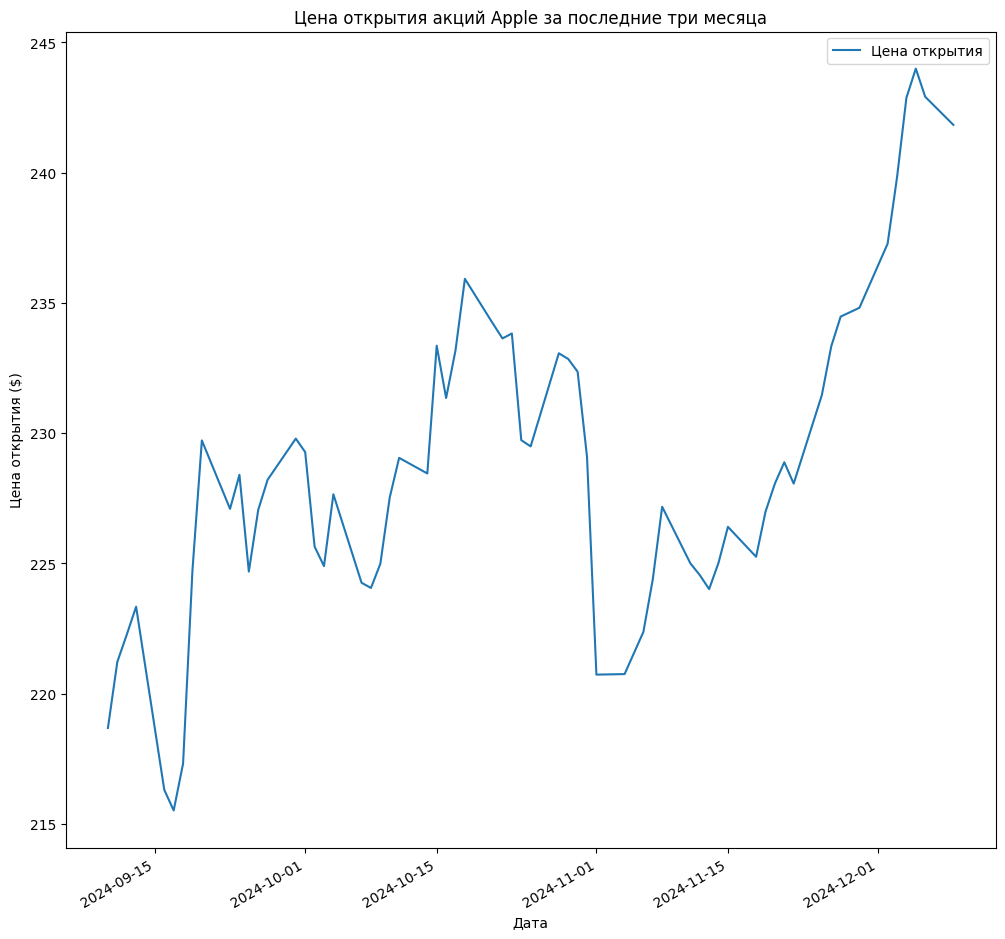

In [6]:
history.plot(kind='line', figsize=(12,12), y='Open', title='Цена открытия акций Apple за последние три месяца')
plt.xlabel('Дата')
plt.ylabel('Цена открытия ($)')
plt.legend(['Цена открытия'])

In [7]:
history.reset_index(inplace=True)
stock_cost = history['Open'].to_numpy()

In [8]:
stock_cost

array([218.67940838, 221.21662032, 222.25546947, 223.33429284,
       216.30201959, 215.51289221, 217.31091546, 224.74274368,
       229.71726252, 227.09015412, 228.39870926, 224.68279593,
       227.05019906, 228.20893469, 229.78718848, 229.26777052,
       225.64175566, 224.89256551, 227.64953269, 224.25327473,
       224.05349543, 224.982474  , 227.5296745 , 229.04800352,
       228.44865816, 233.35326059, 231.34547369, 233.17345904,
       235.92042557, 234.19234019, 233.6329633 , 233.82275213,
       229.72725668, 229.48752257, 233.06359498, 232.84382711,
       232.35435817, 229.08795101, 220.72715344, 220.74713842,
       221.55624147, 222.36535526, 224.38313702, 227.16999817,
       225.        , 224.55000305, 224.00999451, 225.02000427,
       226.3999939 , 225.25      , 226.97999573, 228.05999756,
       228.88000488, 228.05999756, 231.46000671, 233.33000183,
       234.47000122, 234.80999756, 237.27000427, 239.80999756,
       242.86999512, 243.99000549, 242.91000366, 241.83

In [9]:
analyzer = StockAnalysis(stock_cost)

Получаем результаты

In [10]:
res = analyzer.get_results()

Вызов get_results с аргументами (<analitica.operations.statistic_operations.StockAnalysis object at 0x000001ED157F0D70>,) {}
Результат -     Stock Cost  Moving average  Differential  Autocorrelation         Max  Min
0   218.679408             NaN           NaN              NaN         NaN  NaN
1   221.216620             NaN      2.537212         0.907536         NaN  NaN
2   222.255469      220.717166      1.038849         0.781371         NaN  NaN
3   223.334293      222.268794      1.078823         0.658008  223.334293  NaN
4   216.302020      220.630594     -7.032273         0.565672         NaN  NaN
..         ...             ...           ...              ...         ...  ...
59  239.809998      237.296666      2.539993         0.644560         NaN  NaN
60  242.869995      239.983332      3.059998        -0.413440         NaN  NaN
61  243.990005      242.223333      1.120010        -0.971965  243.990005  NaN
62  242.910004      243.256668     -1.080002        -1.000000         NaN

c:\Users\osipo\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\osipo\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\osipo\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Объединение первоначальных данных и полученных

In [11]:
if 'Date' in res.columns:
    pass
else:
    res = pd.concat([history['Date'].dt.tz_localize(None), res], axis=1)

In [12]:
res

,Date,Stock Cost,Moving average,Differential,Autocorrelation,Max,Min
0,2024-09-10,218.679408,NaN,NaN,NaN,NaN,NaN
1,2024-09-11,221.216620,NaN,2.537212,0.907536,NaN,NaN
2,2024-09-12,222.255469,220.717166,1.038849,0.781371,NaN,NaN
3,2024-09-13,223.334293,222.268794,1.078823,0.658008,223.334293,NaN
4,2024-09-16,216.302020,220.630594,-7.032273,0.565672,NaN,NaN
...,...,...,...,...,...,...,...
59,2024-12-03,239.809998,237.296666,2.539993,0.644560,NaN,NaN
60,2024-12-04,242.869995,239.983332,3.059998,-0.413440,NaN,NaN
61,2024-12-05,243.990005,242.223333,1.120010,-0.971965,243.990005,NaN
62,2024-12-06,242.910004,243.256668,-1.080002,-1.000000,NaN,NaN


C:\Users\osipo\AppData\Local\Temp\ipykernel_12120\2377898960.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\osipo\AppData\Local\Temp\ipykernel_12120\2377898960.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\osipo\AppData\Local\Temp\ipykernel_12120\2377898960.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\osipo\AppData\Local\Temp\ipykernel_12120\2377898960.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pl

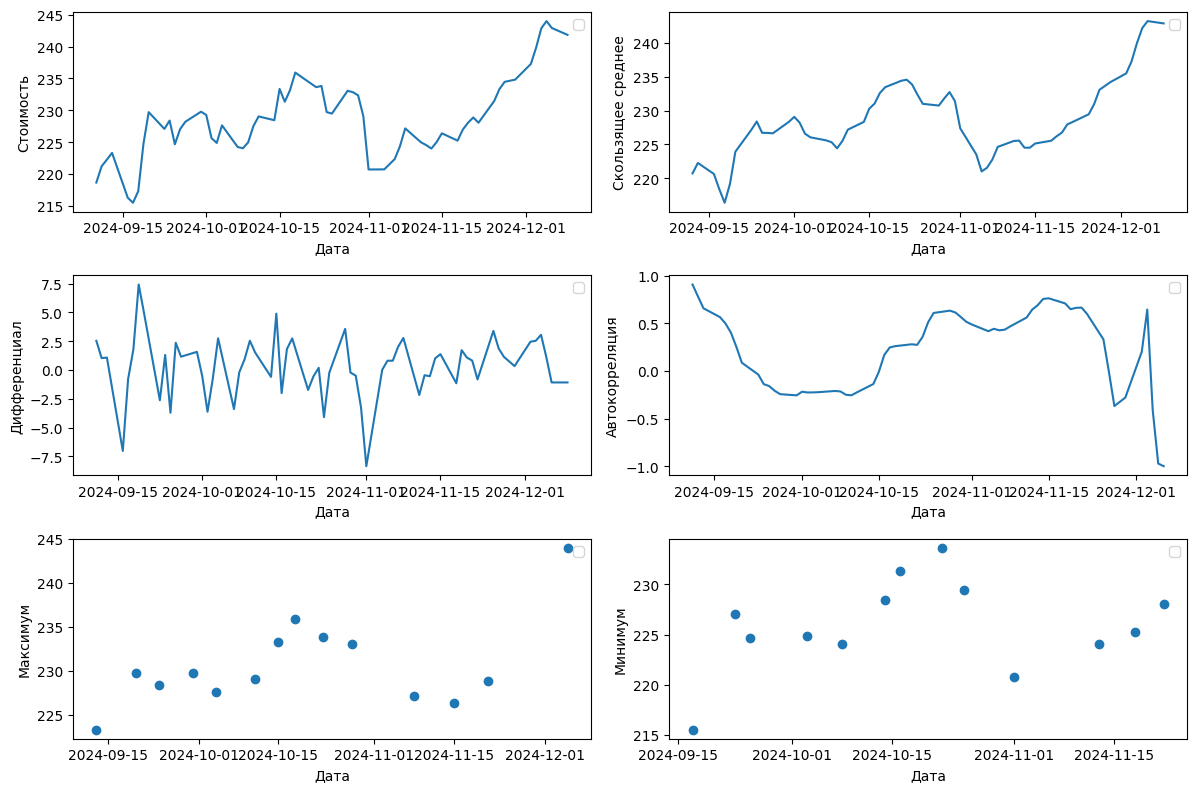

In [15]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(res['Date'], res['Stock Cost'])
plt.xlabel('Дата')
plt.ylabel('Стоимость')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(res['Date'], res['Moving average'])
plt.xlabel('Дата')
plt.ylabel('Скользящее среднее')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(res['Date'], res['Differential'])
plt.xlabel('Дата')
plt.ylabel('Дифференциал')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(res['Date'], res['Autocorrelation'],)
plt.xlabel('Дата')
plt.ylabel('Автокорреляция')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(res['Date'], res['Max'], marker='o')
plt.xlabel('Дата')
plt.ylabel('Максимум')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(res['Date'], res['Min'],  marker='o')
plt.xlabel('Дата')
plt.ylabel('Минимум')
plt.legend()

plt.tight_layout()
plt.show()

Сохраняем в Excel

In [16]:
with pd.ExcelWriter('stock.xlsx', mode='w', engine='openpyxl') as writer:
    res.to_excel(writer, sheet_name='Акции Apple', index=False)
    
print(f"Успешно сохранено: {'stock.xlsx'}")

Успешно сохранено: stock.xlsx
